Flow Metering Calculations tool


Separator Data inputs

<img src="image.png">



In [55]:
#separator information
import math

#vessel size
vol3 = (math.pi * ((2-0.0182)/2) ** 2) * 7.92 # example Big Flash Separator

D = 1.09728   #1.09728
W = 3.048     #3.048

VolT = (math.pi * (D/2) ** 2) * W
"""

W=
D=
vol = W * D

"""


liql = 0.5  #0-1 fraction liquid level
volliq = VolT * liql    #
volG = VolT - volliq
time = 120  # seconds

Qmaxl = (volliq / time) * 86400 # to get m3/d
Qmaxg = (volG / time) * 86400   # to get m3/d



print("the maximun liquid flow rate using ","{:.0f}".format(time/60)," minutes of retention time is: ","{:.2f}".format(Qmaxl)," m3/d")
print("the maximun Gas flow rate using ","{:.0f}".format(time/60)," minutes of retention time is: ","{:.2f}".format(Qmaxg)," m3/d")


the maximun liquid flow rate using  2  minutes of retention time is:  1037.63  m3/d
the maximun Gas flow rate using  2  minutes of retention time is:  1037.63  m3/d


Vl Velocity of liquid flow (ft/sec)


$\ Vl =(0.012) \frac{\ Ql}{d^{2}} $

$\ Ql =   \frac{\ Vl d^{2}}{0.012} $

Where:  

-Ql lquid flow rate (bpd)

-d internal diameter

Vg Velocity of gas flow (ft/sec)

$\ Vg =(60) \frac{\ Qg TZ}{d^{2}P} $

$\ Qq =   \frac{\ Vg d^{2}P}{60TZ} $

Where:

-T Temperature [°R]

-P Pressure [psia]

-d internal diameter [in]

-Z gas compressibility factor

-Qg gas flow MMSCFD

In [2]:
import pandas as pd
import numpy as np

pipes = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Azure_DATA_LAKE\pipes_sizes.csv')

pipes.head()

,Pipe diameter,OD,Schedule,d,CS A (m2)
0,2,2.375,80,1.939,0.000606
1,2,2.375,160,1.687,0.000459
2,3,3.500,40,3.280,0.001735
3,3,3.500,80,2.900,0.001356
4,3,3.500,160,2.624,0.001111


In [56]:
#Calculating gas flow measurements
#data inputs
Vl = range(1,50)
Vg = Vl
T =  20 * (9/5) + 491.67
P = (42.5 * 14.5038)
Z = 0.815

dl = pipes[(pipes['Schedule']=='80') & (pipes['Pipe diameter']==3)].iloc[0,3] # total liquid for biphase
do = pipes[(pipes['Schedule']=='80') & (pipes['Pipe diameter']==3)].iloc[0,3] # oil line
dw = pipes[(pipes['Schedule']=='80') & (pipes['Pipe diameter']==2)].iloc[0,3] # water line
dg = pipes[(pipes['Schedule']=='80') & (pipes['Pipe diameter']==6)].iloc[0,3] # gas line

#d.iloc[0,3]
#d**2
Vmaxl = (0.012)*(Qmaxl/(dl**2))
print("the maximun liquid flow rate is: ","{:.2f}".format(Qmaxl)," m3/d and the velocity is: ","{:.2f}".format(Vmaxl)," ft/s")


WC = 0.15 # water cut
OilFVF = 1.18852694
Bo = 1 / OilFVF
Qostd = Qo*OilFVF


GOR = 1000
Qgas2 = Qostd * GOR
Vmaxg = 60 * ((Qgas2/28252.14)*T*Z)/((dg**2) * P) 

GasFVF = 0.021128
Bg = 1/GasFVF



Qw = Qmaxl * level
Vw = (0.012)*(Qw/(dw**2))
Qo = Qmaxl * (1-level) 
Vo = (0.012)*(Qo/(do**2))

Qgstd = Qmaxg * Bg


#Qw = Vmaxl * (dw ** 2) / 0.012
print("Water maximum flow rate at: ","{:.2f}".format(Vw)," ft/s is: ","{:.2f}".format(Qw)," m3/d ")

#Qo = Vmaxl * (do ** 2) / 0.012
print("Oil maximum flow rate at: ","{:.2f}".format(Vo)," ft/s is: ","{:.2f}".format(Qostd)," Sm3/d ")

#Qo = Vmaxl * (do ** 2) / 0.012
print("Gas maximum flow rate at: ","{:.2f}".format(Vmaxg)," ft/s is: ","{:.2f}".format(Qgas2)," Sm3/d ")


the maximun liquid flow rate is:  1037.63  m3/d and the velocity is:  1.48  ft/s
Water maximum flow rate at:  0.50  ft/s is:  155.64  m3/d 
Oil maximum flow rate at:  1.26  ft/s is:  1048.26  Sm3/d 
Gas maximum flow rate at:  46.80  ft/s is:  1048262.93  Sm3/d 


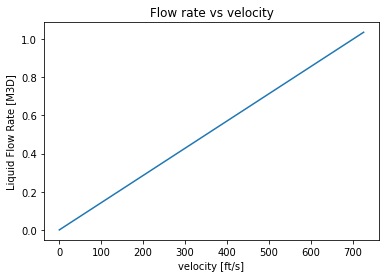

In [27]:
import matplotlib.pyplot as plt
import numpy as np

Q1 = range(727)
Vmax1 = (0.012)*(Q1/(do**2))


plt.plot(Vmax1)
plt.title("Flow rate vs velocity")
plt.xlabel("velocity [ft/s]")
plt.ylabel("Liquid Flow Rate [M3D]")
plt.show()

